# **PROYECTO FINAL**
Mateo Herrera Muñoz - 1020825873

#**Predicción del exito de una aplicación para dispositivos android, evaluada por cantidad de instalaciones**

## Conjunto de datos **Google Play Store Apps**



# Imports

In [103]:
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np
import seaborn as sns

# Carga de datos

Carga de los datos de aplicaciones y reviews

In [1]:
id1 = 'https://drive.google.com/file/d/12F4pjlLtsAx-hUvF2QN3XVWU0hGrRbSD/view?usp=sharing'.split('/')[-2]
id2 = 'https://drive.google.com/file/d/1lrU0fmQP126MStP9PL9Vyz7sTfRCg-cF/view?usp=sharing'.split('/')[-2]
dwld = 'https://drive.google.com/uc?export=download&id='
apps_data = pd.read_csv(dwld+id1)
apps_data.dataframeName = 'apps_data'
users_reviews_data = pd.read_csv(dwld+id2)
users_reviews_data.dataframeName = 'users_reviews_data'

NameError: name 'pd' is not defined

Visualización del tamaño de las tablas

In [105]:
print('apps_data shape = {}'.format(apps_data.shape))
print('users_reviews_data = {}'.format(users_reviews_data.shape))

apps_data shape = (10841, 13)
users_reviews_data = (64295, 5)


apps_data shape = (9657, 10)
users_reviews_data = (37432, 5)

# Funciones de graficado

In [106]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [107]:
def plot_data(X, y):
    y_unique = np.unique(y)
    colors = plt.cm.rainbow(np.linspace(0.0, 1.0, y_unique.size))
    for this_y, color in zip(y_unique, colors):
        this_X = X[y == this_y]
        plt.scatter(this_X[:, 0], this_X[:, 1],  c=color,
                    alpha=0.5, edgecolor='k',
                    label="Class %s" % this_y)
    plt.legend(loc="best")
    plt.title("Data")
    
# Función para visualizar de la superficie de decisión de un clasificador
def plot_decision_region(X, pred_fun):
    min_x = np.min(X[:, 0])
    max_x = np.max(X[:, 0])
    min_y = np.min(X[:, 1])
    max_y = np.max(X[:, 1])
    min_x = min_x - (max_x - min_x) * 0.05
    max_x = max_x + (max_x - min_x) * 0.05
    min_y = min_y - (max_y - min_y) * 0.05
    max_y = max_y + (max_y - min_y) * 0.05
    x_vals = np.linspace(min_x, max_x, 100)
    y_vals = np.linspace(min_y, max_y, 100)
    XX, YY = np.meshgrid(x_vals, y_vals)
    grid_r, grid_c = XX.shape
    ZZ = np.zeros((grid_r, grid_c))
    for i in range(grid_r):
        for j in range(grid_c):
            ZZ[i, j] = pred_fun(XX[i, j], YY[i, j])
    plt.contourf(XX, YY, ZZ, 100, cmap = plt.cm.coolwarm, vmin= -1, vmax=2)
    plt.colorbar()
    plt.xlabel("x")
    plt.ylabel("y")
    
class MidpointNormalize(Normalize):

    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))
    
def gen_pred_fun(clf):
    def pred_fun(x1, x2):
        x = np.array([[x1, x2]])
        return clf.predict(x)[0]
    return pred_fun

def plot_labels(n_folds, n_classes, list_labels):
    ind = np.arange(n_folds)
    width = 0.15
    
    countings = []
    for labels in list_labels:
        labels = np.array(labels)
        countings.append([np.count_nonzero(labels == x) for x in range(n_classes)])
    
    class_bars = []
    for cls in range(n_classes):
        class_bars.append([l[cls] for l in countings])
    
    fig, ax = plt.subplots()
    i = 0
    for class_bar in class_bars:
        ax.bar(ind + width*i, class_bar, width, label='Clase '+str(i))
        i += 1
        
    ax.set_xticks(ind + 2*width / 3)
    ax.set_xticklabels(['Pliegue {}'.format(k) for k in range(n_folds)])
    plt.legend(loc="best")
    plt.title("Etiquetas")

# Exploración y limpieza de datos

## Limpieza de datos de aplicaciones

In [108]:
df1 = apps_data.copy()
df2 = users_reviews_data.copy()

Vista de la tabla de aplicaciones

In [109]:
df1.sample(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9479,Lily & Leo - Crazy Circus Day,FAMILY,3.6,8091,43M,"1,000,000+",Free,0,Everyone,Casual;Pretend Play,"June 5, 2018",1.0.8,4.1 and up
1196,hellofood - Food Delivery,FOOD_AND_DRINK,4.0,43614,25M,"1,000,000+",Free,0,Everyone,Food & Drink,"October 12, 2016",2.14.36,4.0.3 and up
9342,Fashion Pony Girls Dress Up Makeup Game,FAMILY,4.5,256,30M,"10,000+",Free,0,Everyone,Simulation,"July 13, 2018",1.7,4.0 and up
9660,23rd QM BDE EO,BUSINESS,NaN,0,6.3M,10+,Free,0,Everyone,Business,"September 27, 2017",1.0.0,4.1 and up
9603,Yahoo Fantasy Sports - #1 Rated Fantasy App,SPORTS,4.2,277939,Varies with device,"5,000,000+",Free,0,Mature 17+,Sports,"August 2, 2018",Varies with device,Varies with device
9746,Plastic Surgery Surgeon Simulator Er Doctor Games,FAMILY,3.7,3482,37M,"500,000+",Free,0,Everyone,Casual,"August 7, 2018",1.6,4.4 and up
2843,Snap Cat Face Camera,PHOTOGRAPHY,4.0,5855,4.9M,"1,000,000+",Free,0,Everyone,Photography,"July 12, 2018",1.6,2.3 and up
10207,Profile Tracker - Who Viewed My Facebook Profile,SOCIAL,4.7,37090,4.8M,"500,000+",Free,0,Teen,Social,"August 1, 2018",5.4,4.1 and up
5490,True Skate,SPORTS,4.4,129409,73M,"1,000,000+",Paid,$1.99,Everyone,Sports,"August 4, 2018",1.5.1,4.0.3 and up
3336,Speedcheck,TOOLS,4.6,48979,14M,"1,000,000+",Free,0,Everyone,Tools,"August 4, 2018",5.0.0.8,4.0.3 and up


Se cuentan la cantidad de filas duplicadas por la columna 'App' y se eliminan los duplicados cinservando la primera fila encontrada de cada aplicación

In [110]:
df1['App'].duplicated().sum()

1181

In [111]:
df1.drop_duplicates(subset='App', keep='first', inplace=True)

In [112]:
df1.duplicated().sum()

0

Se visualiza la información y frecuencia de campos vacios por columna



In [113]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9660 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9660 non-null   object 
 1   Category        9660 non-null   object 
 2   Rating          8197 non-null   float64
 3   Reviews         9660 non-null   object 
 4   Size            9660 non-null   object 
 5   Installs        9660 non-null   object 
 6   Type            9659 non-null   object 
 7   Price           9660 non-null   object 
 8   Content Rating  9659 non-null   object 
 9   Genres          9660 non-null   object 
 10  Last Updated    9660 non-null   object 
 11  Current Ver     9652 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


In [114]:
df1.isnull().sum()

App                  0
Category             0
Rating            1463
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Observamos que hay un datos en la columna 'Rating' que está fuera del rango de calificación. Adicionalmente se observa que la fila tiene información en campos equivocados, por lo que se elimina la fila.

In [115]:
df1['Rating'].unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

In [116]:
df1[df1.Rating == 19.]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [117]:
df1.drop(index=10472, axis=0, inplace=True)

Ya que la columna de 'Rating' es un dato importante, los campos vacios son remplazados por el valor medio de la columna y convertido a tipo numerico

In [118]:
df1['Rating'] = pd.to_numeric(df1['Rating'])

In [119]:
m = df1['Rating'].mean().round(1)
df1['Rating'] = df1['Rating'].fillna(m)

Se cambia el tipo de dato a númerico en la columna Reviews

In [120]:
df1['Reviews'] = pd.to_numeric(df1['Reviews'])

En la columna 'Size' se convierten los valores a float en unidades de k (kilobytes) y los valores de 'Varies with device' se remplazan por la media

In [121]:
def get_size(size):
    if size[-1] == 'k':
        return float(size[:-1])
    elif size[-1] == 'M':
        return float(size[:-1])*1000
    else:
        return size

df1['Size'] = df1['Size'].apply(get_size)

In [122]:
m = df1[df1.Size != 'Varies with device']['Size'].mean().round(1)
df1['Size'].replace(['Varies with device'], m, inplace=True)

Se encuentra una fila con el campo 'Type' = vacio y es remplazado por 'Free', ya que tiene 'Price' = 0

In [123]:
df1[df1['Type'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,4.2,0,20395.3,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [124]:
df1['Type'].fillna('Free', inplace=True)

Se cambia el tipo de dato de la columna 'Type' de tal forma que el valor 'Free' = 1 y 'Paid' = 0

In [125]:
df1['Type'].unique()

array(['Free', 'Paid'], dtype=object)

In [126]:
def get_type(type):
    if type == 'Free':
        return 1
    else:
        return 0

df1['Free'] = df1['Type'].apply(get_type)
df1.drop(['Type'], axis=1, inplace=True)

Se eliminan los simbolos de la columna 'Installs' y se convierte a tipo númerico

In [127]:
df1['Installs'] = df1['Installs'].str.replace(r"[^a-zA-Z\d\_]+","")
df1['Installs'] = pd.to_numeric(df1['Installs'])

<ipython-input-127-a60e2c074528>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df1['Installs'] = df1['Installs'].str.replace(r"[^a-zA-Z\d\_]+","")


In [128]:
df1[(df1['Installs'] == 0)].shape

(15, 13)

In [129]:
df1.drop(df1[(df1['Installs'] == 0)].index, inplace=True)

Se eliminan los simbolos de la columna 'Price' y se convierte a tipo numerico

In [130]:
df1['Price'] = df1['Price'].str.replace(r"[^0-9\.-]+","")
df1['Price'] = pd.to_numeric(df1['Price'])

<ipython-input-130-7df3ee4662d0>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df1['Price'] = df1['Price'].str.replace(r"[^0-9\.-]+","")


In [131]:
df1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
Free              0
dtype: int64

Se eliminan las columnas "Last Updated", "Current Ver", "Android Ver". Ya que no se consideran muy relevantes para este análisis

In [132]:
df1.drop(["Last Updated","Current Ver","Android Ver"], inplace=True, axis=1)

In [133]:
df1.sample(10)

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Free
2875,InstaCam - Camera for Selfie,PHOTOGRAPHY,4.0,15098,10000.0,1000000,0.00,Everyone,Photography,1
9244,AP Stamps and Registration,BOOKS_AND_REFERENCE,3.4,82,2700.0,10000,0.00,Everyone,Books & Reference,1
4628,U LIVE – Video Chat & Stream,SOCIAL,4.5,67611,21000.0,1000000,0.00,Mature 17+,Social,1
7726,CQ SIGNAL PRO 5,FINANCE,4.2,0,1600.0,10,0.00,Everyone,Finance,1
6031,BD Dialer,COMMUNICATION,4.1,29,13000.0,10000,0.00,Everyone,Communication,1
5412,Attack the Light,FAMILY,4.7,19209,21000.0,100000,2.99,Everyone,Role Playing;Action & Adventure,0
1283,Garmin Connect™,HEALTH_AND_FITNESS,3.9,232153,20395.3,10000000,0.00,Everyone,Health & Fitness,1
366,UC Browser Mini -Tiny Fast Private & Secure,COMMUNICATION,4.4,3648120,3300.0,100000000,0.00,Teen,Communication,1
6515,BN Pro RobotoXL-b HD Text,LIBRARIES_AND_DEMO,4.2,86,459.0,10000,0.00,Everyone,Libraries & Demo,1
4262,"The Voice, sing and connect",FAMILY,4.1,405824,20395.3,10000000,0.00,Everyone,Entertainment,1


Se visualizan los valores y sus frecuencias de las columnas 'Category', 'Content Rating' y 'Genres' para observar como son sus valores.

In [134]:
print('Category values count\n',df1['Category'].value_counts(), '\n'*2)
print('Content Rating values count\n',df1['Content Rating'].value_counts(), '\n'*2)
print('Genres value count\n',df1['Genres'].value_counts().to_string())

Category values count
 FAMILY                 1829
GAME                    959
TOOLS                   827
BUSINESS                419
MEDICAL                 394
PERSONALIZATION         375
PRODUCTIVITY            373
LIFESTYLE               368
FINANCE                 343
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      253
SOCIAL                  237
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        218
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           63
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: Category, dtype: int64 


Content Rating values

Se observa que la columna 'Content Rating' tiene filas con el valor 'Unrated', por lo que son eliminadas

In [135]:
df1[df1['Content Rating'] == 'Unrated']

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Free
7312,Best CG Photography,FAMILY,4.2,1,2500.0,500,0.0,Unrated,Entertainment,1
8266,DC Universe Online Map,TOOLS,4.1,1186,6400.0,50000,0.0,Unrated,Tools,1


In [136]:
df1.drop(df1[df1['Content Rating'] == 'Unrated'].index, inplace=True)

Se observa que en la columna 'Genres' algunos valores contienen más de un descriptor, por lo que se conserva unicamente el primero

In [137]:
def main_g(g):
    if ';' in g:
        lg = g.split(';')
        m = lg[0]
        return m
    return g
    
df1['Genres'] = df1['Genres'].apply(main_g)

In [138]:
df1['Genres'].value_counts()

Tools                      826
Entertainment              591
Education                  578
Business                   419
Medical                    394
Personalization            375
Productivity               373
Lifestyle                  369
Finance                    343
Sports                     335
Communication              316
Action                     311
Health & Fitness           290
Photography                281
News & Magazines           253
Social                     237
Books & Reference          225
Casual                     225
Travel & Local             218
Simulation                 206
Shopping                   202
Arcade                     199
Dating                     171
Video Players & Editors    165
Puzzle                     142
Maps & Navigation          131
Role Playing               115
Food & Drink               112
Racing                     108
Educational                102
Strategy                    98
Auto & Vehicles             85
Librarie

Vemos que hay un valor 'Music & Audio' unico, por lo que se ajusta a 'Music'

In [139]:
df1.Genres.replace('Music & Audio', 'Music', inplace=True)

### Preprocesamiento de los datos

Se realiza un etiquetado para las propiedades de las columnas 'Generes'y 'Content Rating'.
También se añade una columna por cada valor de la columna 'Category' con la función get_dummies() de pandas.

In [140]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df1['Genres'] = le.fit_transform(df1['Genres'])
df1['Content Rating'] = le.fit_transform(df1['Content Rating'])

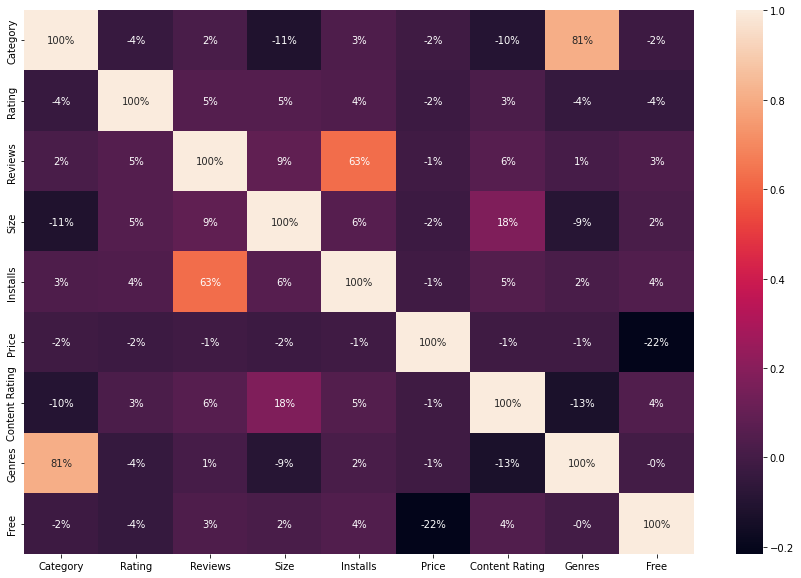

In [141]:
d = df1.drop(['App'], axis=1)
d['Category'] = le.fit_transform(d['Category'])
corr = d.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, xticklabels=d.columns, yticklabels=d.columns, annot=True,fmt=".0%")
plt.show()

Se convierte la columna 'Categpry' en multiples columnas de indicador por cada una de las clases de la columna original

In [142]:
df1 = pd.get_dummies(df1, columns=['Category'], prefix=('Cat'),drop_first=True)

In [143]:
df1.head()

,App,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Free,Cat_AUTO_AND_VEHICLES,...,Cat_PERSONALIZATION,Cat_PHOTOGRAPHY,Cat_PRODUCTIVITY,Cat_SHOPPING,Cat_SOCIAL,Cat_SPORTS,Cat_TOOLS,Cat_TRAVEL_AND_LOCAL,Cat_VIDEO_PLAYERS,Cat_WEATHER
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,19000.0,10000,0.0,1,3,1,0,...,0,0,0,0,0,0,0,0,0,0
1,Coloring book moana,3.9,967,14000.0,500000,0.0,1,3,1,0,...,0,0,0,0,0,0,0,0,0,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,87510,8700.0,5000000,0.0,1,3,1,0,...,0,0,0,0,0,0,0,0,0,0
3,Sketch - Draw & Paint,4.5,215644,25000.0,50000000,0.0,4,3,1,0,...,0,0,0,0,0,0,0,0,0,0
4,Pixel Draw - Number Art Coloring Book,4.3,967,2800.0,100000,0.0,1,3,1,0,...,0,0,0,0,0,0,0,0,0,0


Se elimina la columna 'Reviews', ya que es notable que depende directamente de la cantidad de instalaciones de cada aplicación

In [144]:
df1.drop(['App'], axis=1).head()

,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Free,Cat_AUTO_AND_VEHICLES,Cat_BEAUTY,...,Cat_PERSONALIZATION,Cat_PHOTOGRAPHY,Cat_PRODUCTIVITY,Cat_SHOPPING,Cat_SOCIAL,Cat_SPORTS,Cat_TOOLS,Cat_TRAVEL_AND_LOCAL,Cat_VIDEO_PLAYERS,Cat_WEATHER
0,4.1,159,19000.0,10000,0.0,1,3,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,967,14000.0,500000,0.0,1,3,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.7,87510,8700.0,5000000,0.0,1,3,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.5,215644,25000.0,50000000,0.0,4,3,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.3,967,2800.0,100000,0.0,1,3,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [145]:
df1.drop(['Reviews'], inplace=True, axis=1)

Se realiza una pequeña reordenación

In [146]:
installs = df1.pop('Installs')
df1.insert(1, 'Installs', installs)
free = df1.pop('Free')
df1.insert(4, 'Free', free)

In [147]:
df1.reset_index(inplace=True)

In [148]:
'''d = df1.drop(['App'], axis=1)
cor = d.corr()
plt.figure(figsize=(15,10))
sns.heatmap(cor, xticklabels=d.columns, yticklabels=d.columns, annot=True,fmt=".0%")
plt.show() '''

'd = df1.drop([\'App\'], axis=1)\ncor = d.corr()\nplt.figure(figsize=(15,10))\nsns.heatmap(cor, xticklabels=d.columns, yticklabels=d.columns, annot=True,fmt=".0%")\nplt.show() '

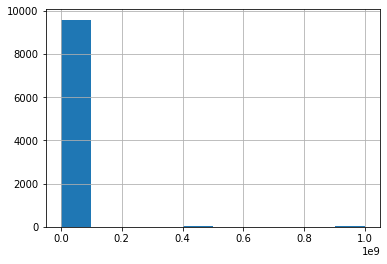

In [149]:
df1['Installs'].hist(bins=10)

Se trata de reducir los valores atipicos usando 3 desviaciones estandar

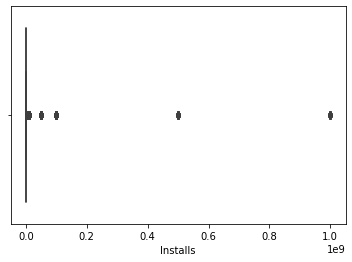

In [150]:
sns.boxplot(x=df1['Installs'])

In [151]:
def outliers(col, df):
    mean = df[col].mean()
    std = df[col].std()
    cut_off = std * 3
    lower = mean - cut_off
    upper = mean + cut_off
    return lower, upper

In [152]:
lower, upper = outliers('Installs', df1)
lower, upper

(-153622770.89873186, 169205199.2387028)

In [153]:
df1 = df1[(df1['Installs'] >= lower) & (df1['Installs'] <= upper)]

(9598, 41)


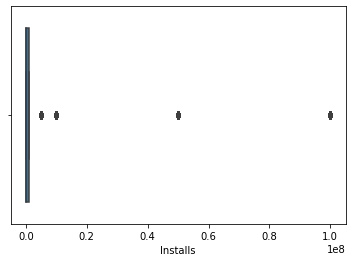

In [154]:
print(df1.shape)
sns.boxplot(x=df1['Installs'])

In [155]:
#df1.Size.hist(bins=100)

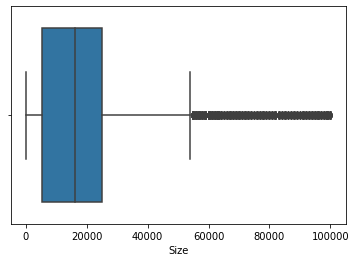

In [156]:
sns.boxplot(x=df1['Size'])

In [157]:
lower, upper = outliers('Size', df1)
lower, upper

(-40858.64492499941, 81626.50845906901)

In [158]:
df1 = df1[(df1['Size'] >= lower) & (df1['Size'] <= upper)]

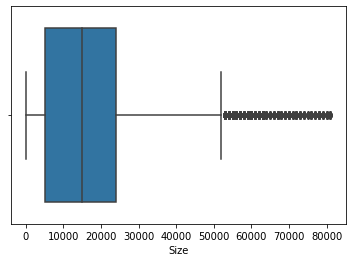

In [159]:
sns.boxplot(x=df1['Size'])

## Limpieza de datos de reviews

In [160]:
df2.sample(10)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
11130,Babbel – Learn Languages,The read pronunciation correctly.,Neutral,0.000000,0.000000
49164,Free Dating App - Meet Local Singles - Flirt Chat,Go ahead. But Uninstalling minutes. Nothing go...,Negative,-0.110000,0.800000
56310,Google Pay,Edit: initial problem seems fixed recent issue...,Positive,0.026154,0.421795
52407,Garden Coloring Book,love ☞ ♥ (^.^)/,Positive,0.750000,0.800000
36859,Dream League Soccer 2018,NaN,NaN,NaN,NaN
15883,Block Puzzle,"I really like game many ads. The game, so anno...",Negative,-0.180000,0.480000
52225,Game for KIDS: KIDS match'em,NaN,NaN,NaN,NaN
30510,Credit Karma,"False scores, misleading, accurate, score fluc...",Neutral,0.000000,0.411111
45519,File Manager -- Take Command of Your Files Easily,"Its easy use, It appeared wear notifications f...",Positive,0.541667,0.833333
23140,Candy Bomb,Exciting...... Good easy play thank u game makers,Positive,0.258333,0.658333


In [161]:
df2.shape

(64295, 5)

Se observa que no se tienen la misma cantidad de aplicaciones dentre las tablas. Por lo que e evidene que se reducirá el tamaño de la información final

In [162]:
len(df2.App.unique()), len(df1.App.unique())

(1074, 9337)

In [163]:
df2.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

Se eliminan las filas con elementos nulos en la columna 2

In [164]:
df2.dropna(axis=0, thresh=2, inplace=True)

In [165]:
df2.isnull().sum()

App                       0
Translated_Review         5
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [166]:
df2['Translated_Review'].fillna('', inplace=True)

In [167]:
df2.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

Se etiquetan los valores de ['Positive', 'Neutral', 'Negative'] a -1, 0, 1, respectivamente.

In [168]:
df2['Sentiment'].unique()

array(['Positive', 'Neutral', 'Negative'], dtype=object)

In [169]:
def get_sentiment(sen):
    if sen == 'Positive':
        return 1
    elif sen == 'Neutral':
        return 0
    else:
        return -1

df2['Sentiment'] = df2['Sentiment'].apply(get_sentiment)

In [170]:
df2.sample(10)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
34995,Divar,It's so bad. I do not even show my ads so that...,-1,-0.154545,0.501515
22033,Calorie Counter - MyFitnessPal,It keeps saying cannot connect server. I tried...,0,0.000000,0.066667
57831,Grubhub: Food Delivery,Gmail sign work site. Useless,-1,-0.500000,0.200000
47792,FollowMyHealth®,Big hassle get account started. But powerful d...,1,0.100000,0.366667
53049,Gboard - the Google Keyboard,Overall good implementation daily keyboard loo...,1,0.050000,0.504545
14726,Big Days - Events Countdown,They bribed 5 star review I'm sucker...,-1,-0.300000,0.800000
4793,Air Traffic,waste time phone memory. map visible. air traf...,-1,-0.200000,0.000000
38935,Easy Recipes,Easy recipes taste great! Family loves too!,1,0.716667,0.791667
52291,"Gametime - Tickets to Sports, Concerts, Theater","I love it, wonders, fast, easy, convenient. I ...",1,0.408333,0.658333
51765,GRE Prep & Practice by Magoosh,It high time get watch videos full screen.,1,0.255000,0.545000


In [171]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37432 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     37432 non-null  object 
 1   Translated_Review       37432 non-null  object 
 2   Sentiment               37432 non-null  int64  
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.7+ MB


In [172]:
df2.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

Se crea una subtabla con el objetivo de tomar el sentimiento objetivo medio de las aplicaciones con review

In [173]:
df_sensub = df1.copy()
apps = df_sensub['App'].unique()

sensub_mean = []
empty_sensub = []

for a in apps:
    mean = df2[df2.App == a]['Sentiment_Subjectivity'].mean()
    sensub_mean.append(mean)

In [174]:
df_sensub['Sentiment_Subjectivity'] = sensub_mean

In [175]:
len(df2['App'].unique())

865

In [176]:
df_sensub.dropna(inplace=True)

In [177]:
i = df_sensub.pop('Installs')

In [178]:
df_sensub['Installs'] = i

In [179]:
df_sensub.reset_index(inplace=True)

In [180]:
df_sensub.drop(['level_0'], axis=1, inplace=True)

In [181]:
df_sensub

,index,App,Rating,Size,Free,Price,Content Rating,Genres,Cat_AUTO_AND_VEHICLES,Cat_BEAUTY,...,Cat_PRODUCTIVITY,Cat_SHOPPING,Cat_SOCIAL,Cat_SPORTS,Cat_TOOLS,Cat_TRAVEL_AND_LOCAL,Cat_VIDEO_PLAYERS,Cat_WEATHER,Sentiment_Subjectivity,Installs
0,1,Coloring book moana,3.9,14000.0,1,0.0,1,3,0,0,...,0,0,0,0,0,0,0,0,0.641540,500000
1,8,Garden Coloring Book,4.4,33000.0,1,0.0,1,3,0,0,...,0,0,0,0,0,0,0,0,0.523447,1000000
2,18,FlipaClip - Cartoon animation,4.3,39000.0,1,0.0,1,3,0,0,...,0,0,0,0,0,0,0,0,0.679226,5000000
3,21,Boys Photo Editor - Six Pack & Men's Suit,4.1,12000.0,1,0.0,1,3,0,0,...,0,0,0,0,0,0,0,0,0.479298,100000
4,26,Colorfit - Drawing & Coloring,4.7,25000.0,1,0.0,1,3,0,0,...,0,0,0,0,0,0,0,0,0.572762,500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
768,4126,Dumb Ways to Die 2: The Games,4.2,20395.3,1,0.0,4,11,0,0,...,0,0,0,0,0,0,0,0,0.469423,50000000
769,4945,"AD - Nieuws, Sport, Regio & Entertainment",3.7,20395.3,1,0.0,1,28,0,0,...,0,0,0,0,0,0,0,0,0.465806,1000000
770,5077,AppLock,4.4,20395.3,1,0.0,1,41,0,0,...,0,0,0,0,1,0,0,0,0.499941,100000000
771,5393,Diary with lock password,4.3,9700.0,1,0.0,1,24,0,0,...,0,0,0,0,0,0,0,0,0.509656,5000000


# Modelos

## Transformaciones

Transformación de datos logaritmica.
Esta es aplicada a la columna 'Installs' con el objetivo de normalizarla

In [182]:
def t_log(df, columnsl):
    dft = df.copy()
    for c in columnsl:
        name = 'log_'+c
        dft[name] = np.log(dft[c])
    #dft[[name, c]].hist(figsize=(12,5))
    dft.drop(columnsl, axis=1, inplace=True)
    return dft

Transformación de datos a escala estandar. Es usada en los modelos de regresión excepto en el modelo de red neuronal.

In [183]:
def t_std(df, columnss):
    from sklearn import preprocessing

    stds = preprocessing.StandardScaler()
    df[columnss] = stds.fit_transform(df[columnss].values)
    return df

Transformación de datos min max. Es usada para el modelo de red neuronal, transformndo los datos a una escala entre [0,1].

In [184]:
def t_maxmin(df):
    from sklearn import preprocessing

    dft = df.copy()
    cl = np.delete(dft.columns.values, [0,1])
    mms = preprocessing.MinMaxScaler()
    dft[cl] = mms.fit_transform(dft[cl].values)
    return dft

Selección y separación de datos de entrenamiento y prueba

In [185]:
def splt_dt(df):
    from sklearn.model_selection import train_test_split

    X = df.drop(['log_Installs', 'App'], axis=1)
    y = df['log_Installs']
    print('shapes X = ',X.shape, 'y = ',y.shape)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    return X, y, X_train, X_test, y_train, y_test

In [206]:
columnsl = ['Installs', 'Rating', 'Size']
columnss = ['log_Installs', 'log_Rating', 'log_Size', 'Price']
#columns = ['log_Installs', 'Rating', 'Size', 'Price']
columns = ['log_Installs', 'Size', 'Price']
columnsn = ['Installs']

In [187]:
df1.drop(columns=['Rating'], inplace=True)

## Linear Regression

Se realizan pruebas con los dos conjuntos de datos procesado: df1 y df_sensub

In [188]:
def LinearRegression(df, columnsl, columnss):   
    dft = t_log(df, columnsl)
    dft = t_std(dft, columnss)
    X, y, X_train, X_test, y_train, y_test = splt_dt(dft)

    from sklearn.linear_model import LinearRegression

    mlr = LinearRegression()
    mlr.fit(X_train, y_train)

    return X, y, X_train, X_test, y_train, y_test, mlr

In [189]:
#df1
Xl1, yl1, Xl_train1, Xl_test1, yl_train1, yl_test1, mlr1 = LinearRegression(df1, columnsn, columns)
print(mlr1.get_params())
print( 'score = ', mlr1.score(Xl_test1, yl_test1))

shapes X =  (9337, 38) y =  (9337,)
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': 'deprecated', 'positive': False}
score =  0.3627162241218518


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-pack

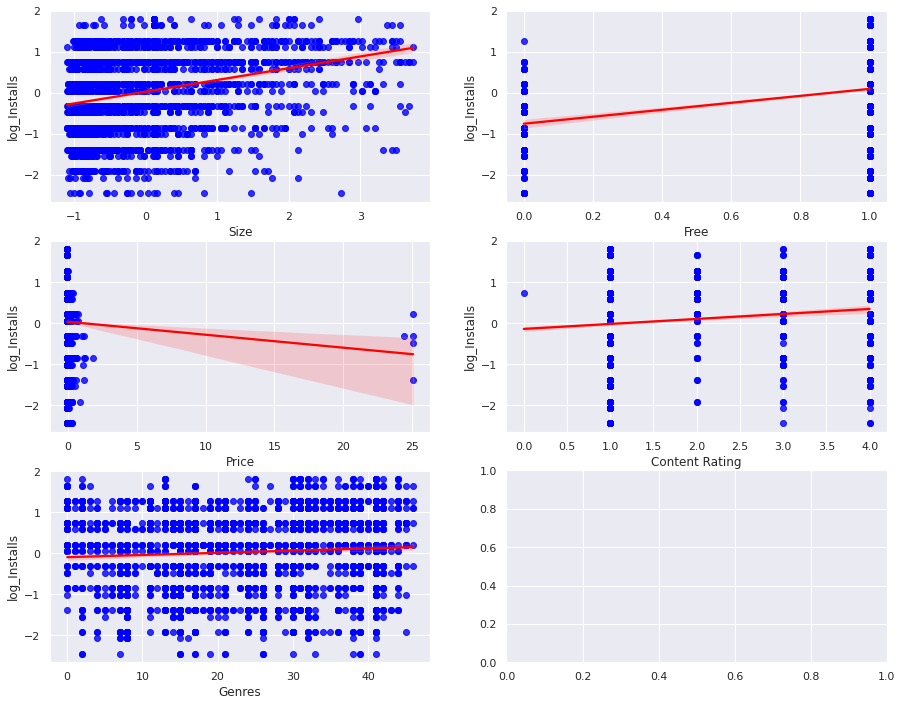

In [232]:
sns.set()
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
sns.regplot(Xl_test1['Size'], yl_test1, ax=axes[0,0], scatter_kws={"color": "blue"}, line_kws={"color": "red"})
sns.regplot(Xl_test1['Free'], yl_test1, ax=axes[0,1], scatter_kws={"color": "blue"}, line_kws={"color": "red"})
sns.regplot(Xl_test1['Price'], yl_test1, ax=axes[1,0], scatter_kws={"color": "blue"}, line_kws={"color": "red"})
sns.regplot(Xl_test1['Content Rating'], yl_test1, ax=axes[1,1], scatter_kws={"color": "blue"}, line_kws={"color": "red"})
sns.regplot(Xl_test1['Genres'], yl_test1, ax=axes[2,0], scatter_kws={"color": "blue"}, line_kws={"color": "red"})

In [190]:
#df_sensub
Xl3, yl3, Xl_train3, Xl_test3, yl_train3, yl_test3, mlr3 = LinearRegression(df_sensub, columnsn, columns)
print(mlr3.get_params())
print( 'score = ', mlr3.score(Xl_test3, yl_test3))

shapes X =  (773, 40) y =  (773,)
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': 'deprecated', 'positive': False}
score =  0.310541549023034


## Kneighbors Regression

Se realizan pruebas con los dos conjuntos de datos procesado: df1 y df_sensub

In [191]:
def KnRegression(df, columnsl, columnss):   
    dft = t_log(df, columnsl)
    dft = t_std(dft, columnss)
    X, y, X_train, X_test, y_train, y_test = splt_dt(dft)

    from sklearn.neighbors import KNeighborsRegressor

    knr = KNeighborsRegressor()
    
    score = {}
    for n in range(3, 201):
        knr.set_params(n_neighbors=n)
        knr.fit(X_train, y_train)
        score[n] = knr.score(X_test, y_test)

    nn = max(score, key=score.get)
    knr.set_params(n_neighbors=nn)

    return X, y, X_train, X_test, y_train, y_test, knr, nn, score[nn]

In [192]:
#df1 
Xk1, yk1, Xk_train1, Xk_test1, yk_train1, yk_test1, knr1, nn1, score1 = KnRegression(df1, columnsn, columns)
print(knr1.get_params())
print('n_neighbors = ', nn1,'score = ', score1)

shapes X =  (9337, 38) y =  (9337,)
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 8, 'p': 2, 'weights': 'uniform'}
n_neighbors =  8 score =  0.4865720222201233


In [193]:
#df_sensub
Xk3, yk3, Xk_train3, Xk_test3, yk_train3, yk_test3, knr3, nn3, score3 = KnRegression(df_sensub, columnsn, columns)
print(knr3.get_params())
print('n_neighbors = ', nn3, 'score = ', score3)

shapes X =  (773, 40) y =  (773,)
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 17, 'p': 2, 'weights': 'uniform'}
n_neighbors =  17 score =  0.23650997753195468


## Random Forest Regressor 

Se realizan pruebas con los dos conjuntos de datos procesado: df1 y df_sensub

In [246]:
def RandomForestReg(df, columnsl, columnss):
    dft = t_log(df, columnsl)
    dft = t_std(dft, columnss)
    X, y, X_train, X_test, y_train, y_test = splt_dt(dft)

    from scipy.stats import uniform, randint
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.model_selection import  RandomizedSearchCV
    from time import time

    param_dist = {"n_estimators": randint(4, 500),
                  "max_features": uniform()}

    start = time()
    n_iter_search = 20
    clf = RandomizedSearchCV(RandomForestRegressor(), param_distributions=param_dist,
                                    n_iter=n_iter_search, cv=5, 
                                    n_jobs=-1, verbose=2)
    clf.fit(X_train, y_train)
    print("GridSearchCV tomó {} segundos usando {} configuraciones".format(time() - start, len(clf.cv_results_['params'])))

    cv_results = pd.DataFrame(clf.cv_results_)
    cv_results = cv_results[['param_n_estimators', 'param_max_features', 'mean_test_score']]
    print(cv_results.sort_values(by='mean_test_score', ascending=False).head())

    return X, y, X_train, X_test, y_train, y_test, clf.best_estimator_, clf.best_params_, clf.best_score_

In [247]:
#df1
X1, y1, X_train1, X_test1, y_train1, y_test1, best_e_1, best_p_1, best_s_1 = RandomForestReg(df1, columnsn, columns) 
print(best_p_1, 'best score = ', best_s_1)

shapes X =  (9337, 38) y =  (9337,)
Fitting 5 folds for each of 20 candidates, totalling 100 fits
GridSearchCV tomó 242.54844045639038 segundos usando 20 configuraciones
   param_n_estimators param_max_features  mean_test_score
16                452           0.653457         0.540163
14                487           0.718054         0.539310
6                 416            0.58122         0.538098
8                 184           0.715931         0.537922
18                205           0.904684         0.537342
{'max_features': 0.6534573766822674, 'n_estimators': 452} best score =  0.5401629448762286


In [244]:
len(best_e_1)

472

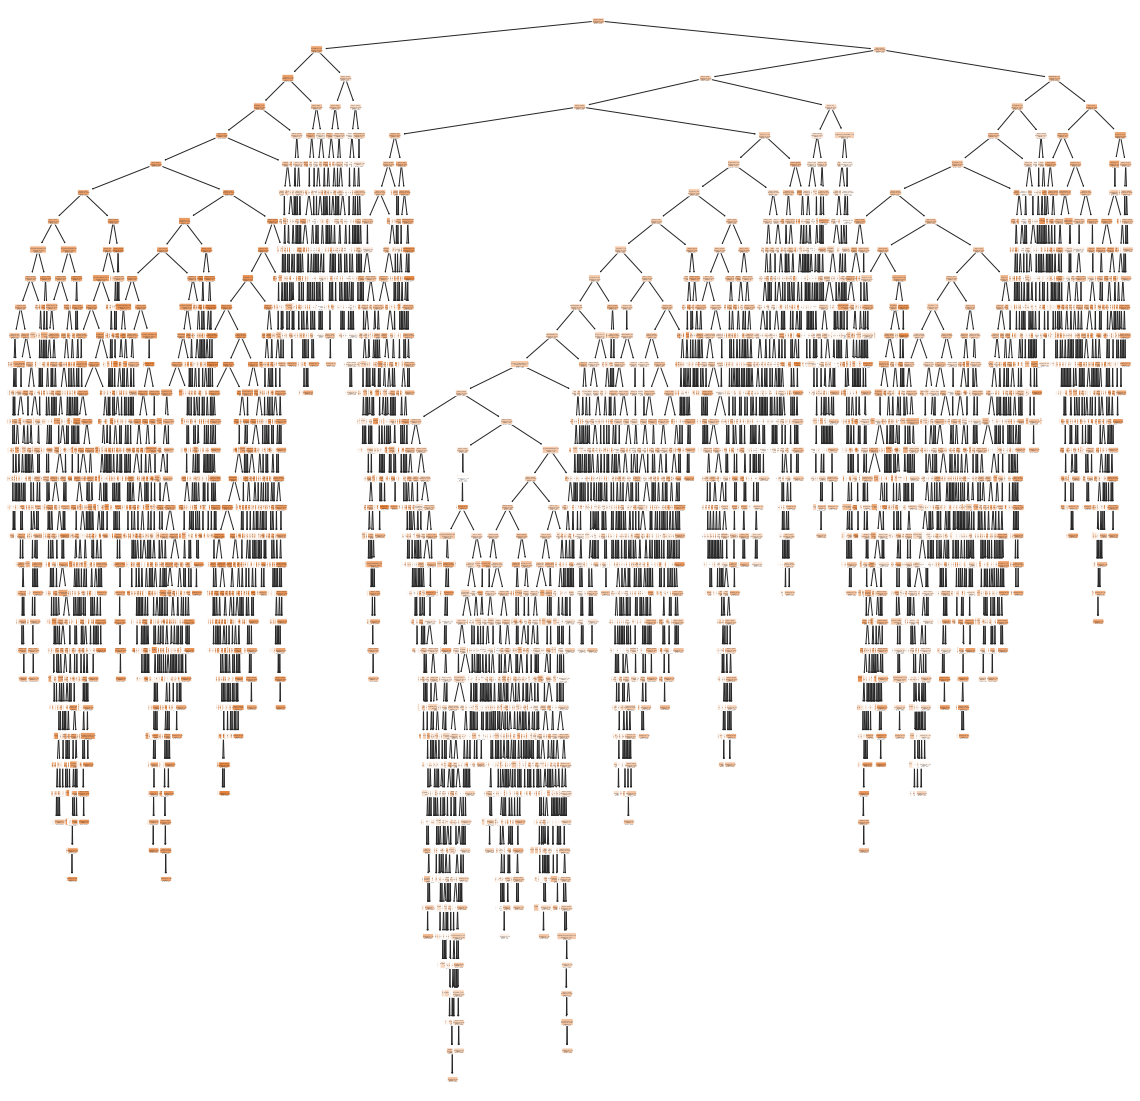

In [242]:
plt.figure(figsize=(20,20))
tree.plot_tree(best_e_1.estimators_[0],feature_names=X1.columns, filled=True, rounded=True)
plt.show()

In [197]:
#df_sensub
X3, y3, X_train3, X_test3, y_train3, y_test3, best_e_3, best_p_3, best_s_3 = RandomForestReg(df_sensub, columnsn, columns)
print(best_p_3, 'best score = ', best_s_3)

shapes X =  (773, 40) y =  (773,)
Fitting 5 folds for each of 20 candidates, totalling 100 fits
GridSearchCV tomó 39.26165533065796 segundos usando 20 configuraciones
   param_n_estimators param_max_features  mean_test_score
3                 440           0.262338         0.377288
2                 499           0.329893         0.376997
18                288           0.176067         0.375956
9                 446           0.273983         0.370861
14                286           0.369751         0.368942
{'max_features': 0.2623377014948389, 'n_estimators': 440} best score =  0.3772876081388933


**Con transformación logarítmica**
1.   df1 {'max_features': 0.35643477332212525, 'n_estimators': 488} 0.6499096250998325
2.   df1_sen {'max_features': 0.12024502196736586, 'n_estimators': 58} 0.37627774560568383
3.   df_sensub {'max_features': 0.13433365385714402, 'n_estimators': 141} 0.35302427169071077





## Red Neuronal

Se realizan pruebas con los dos conjuntos de datos procesado: df1 y df_sensub

In [261]:
def Neuralnet(df, columnsl):
    dft = t_log(df, columnsl)
    dft = t_maxmin(dft)
    X, y, X_train, X_vt, y_train, y_vt = splt_dt(dft)
    X_train = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
    X_vt = X_vt.values.reshape(X_vt.shape[0], X_vt.shape[1], 1)

    from sklearn.model_selection import train_test_split
    
    X_test, X_val, y_test, y_val = train_test_split(X_vt, y_vt, test_size=0.5, random_state=42)

    ni = X.shape[1]

    from keras.models import Sequential
    from keras.layers import Dense, Dropout, Conv1D, Flatten
    from keras import regularizers

    model = Sequential([
        Conv1D(5, 5, activation='relu', input_shape=(ni,1)),
        Flatten(),
        Dense(32, activation='relu'),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(256, activation='relu'),
        Dropout(0.3),
        Dense(512, activation='relu'),
        Dense(1),
    ])

    #print(model.summary())

    from tensorflow.keras import optimizers

    model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
    hist = model.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_val, y_val))

    model.evaluate(X_test, y_test)

    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper right')
    plt.show()

    prediction = model.predict(X_test)

    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='lower right')
    plt.show()

    return X, y, X_train, X_test, y_train, y_test, prediction

shapes X =  (9337, 38) y =  (9337,)
Epoch 1/50
205/205 [==============================] - 3s 10ms/step - loss: 110.2023 - accuracy: 0.0116 - val_loss: 0.2629 - val_accuracy: 0.0079
Epoch 2/50
205/205 [==============================] - 1s 7ms/step - loss: 8.6862 - accuracy: 0.0104 - val_loss: 0.3643 - val_accuracy: 0.0079
Epoch 3/50
205/205 [==============================] - 2s 8ms/step - loss: 4.2731 - accuracy: 0.0093 - val_loss: 0.2529 - val_accuracy: 0.0079
Epoch 4/50
205/205 [==============================] - 1s 7ms/step - loss: 2.2417 - accuracy: 0.0090 - val_loss: 0.1837 - val_accuracy: 0.0079
Epoch 5/50
205/205 [==============================] - 1s 7ms/step - loss: 1.2516 - accuracy: 0.0086 - val_loss: 0.1906 - val_accuracy: 0.0093
Epoch 6/50
205/205 [==============================] - 2s 8ms/step - loss: 0.7741 - accuracy: 0.0124 - val_loss: 0.0991 - val_accuracy: 0.0136
Epoch 7/50
205/205 [==============================] - 1s 7ms/step - loss: 0.4404 - accuracy: 0.0148 - val_los

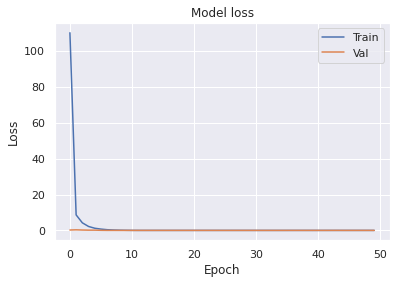

44/44 [==============================] - 0s 2ms/step


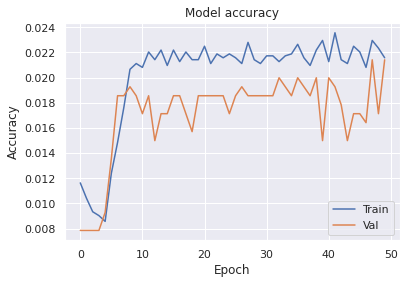

In [262]:
#df1
Xn1, yn1, X_train1, X_test1, y_test1, y_train1, predicction1 = Neuralnet(df1, columnsn)

shapes X =  (773, 40) y =  (773,)
Epoch 1/50
17/17 [==============================] - 1s 17ms/step - loss: 277.1225 - accuracy: 0.0203 - val_loss: 0.1970 - val_accuracy: 0.0603
Epoch 2/50
17/17 [==============================] - 0s 7ms/step - loss: 50.6853 - accuracy: 0.0203 - val_loss: 0.3412 - val_accuracy: 0.0603
Epoch 3/50
17/17 [==============================] - 0s 6ms/step - loss: 26.9399 - accuracy: 0.0259 - val_loss: 0.2763 - val_accuracy: 0.0603
Epoch 4/50
17/17 [==============================] - 0s 8ms/step - loss: 15.8069 - accuracy: 0.0425 - val_loss: 0.1384 - val_accuracy: 0.0345
Epoch 5/50
17/17 [==============================] - 0s 7ms/step - loss: 10.3086 - accuracy: 0.0314 - val_loss: 0.1463 - val_accuracy: 0.0259
Epoch 6/50
17/17 [==============================] - 0s 7ms/step - loss: 7.0616 - accuracy: 0.0296 - val_loss: 0.1734 - val_accuracy: 0.0603
Epoch 7/50
17/17 [==============================] - 0s 7ms/step - loss: 6.0250 - accuracy: 0.0370 - val_loss: 0.1849 - 

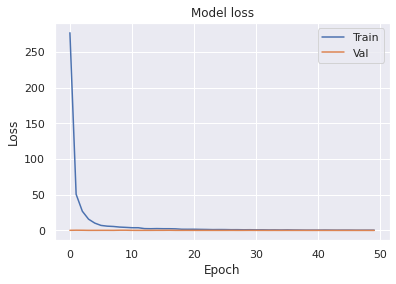

4/4 [==============================] - 0s 5ms/step


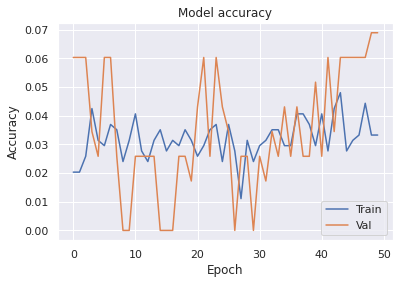

In [263]:
#df_sensub
Xn2, yn2, X_train2, X_test2, y_test2, y_train2, prediction2 = Neuralnet(df_sensub, columnsn)

# Conclusiónes

In [249]:
imp = best_e_1.feature_importances_

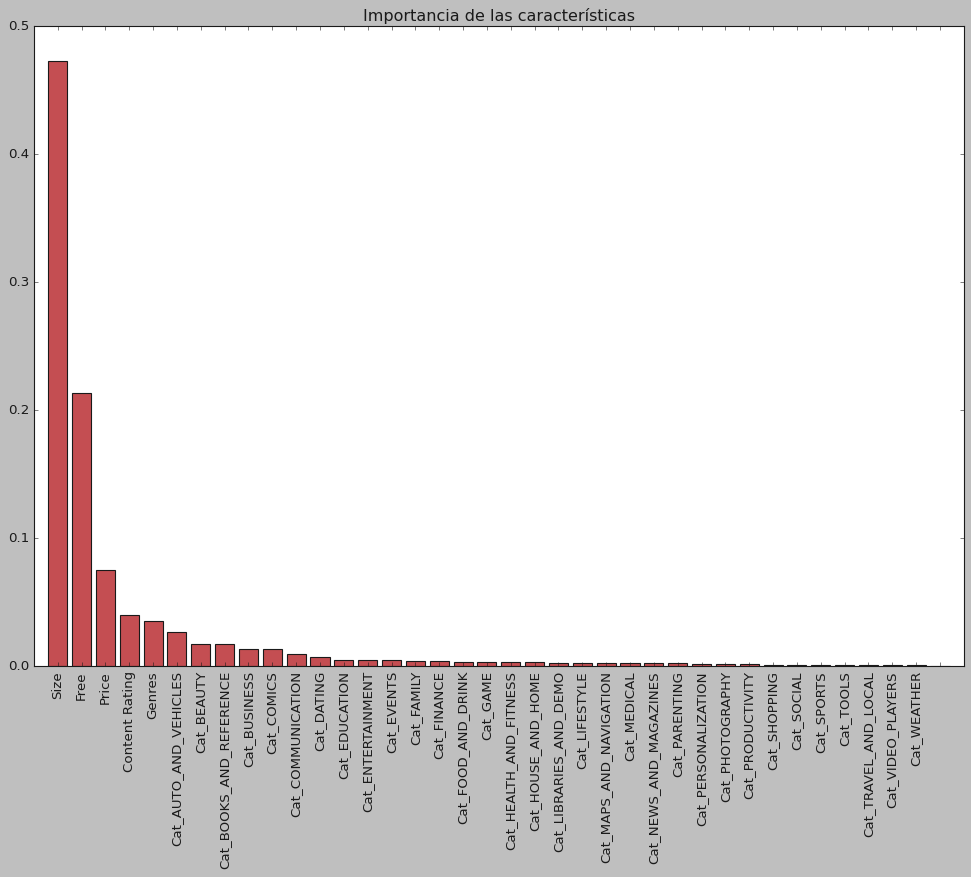

In [276]:
cn = df1.drop(['Installs', 'index', 'App'], axis=1).columns

indices = np.argsort(imp)[::-1]
plt.style.use('classic')
plt.figure(figsize=(15, 10))
plt.title("Importancia de las características")
plt.bar(range(X_train1.shape[1]), imp[indices],
       color="r", align="center")
xticks_labels = cn
plt.xticks(range(X1.shape[1]), xticks_labels, rotation=90)
plt.xlim([-1, X1.shape[1]])
plt.show()

In [ ]:
df1.shape